In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('docs/weld_data/Weld_Data_IBC2.csv')
df_filtrado = df[['timestamp','distancia','fuerza','ampers','volts','watts','estacion','sch']]

columnas_a_escalar = ['distancia', 'fuerza', 'ampers', 'volts', 'watts']

# Rango de escalada
escalador = MinMaxScaler(feature_range=(0, 1))

df_minmax = df_filtrado.copy()

# Reescalando el dataset
df_minmax[columnas_a_escalar] = escalador.fit_transform(df_minmax[columnas_a_escalar])

# Pasamos el timestamp al formato correcto
df_minmax['timestamp'] = pd.to_datetime(df_minmax['timestamp'], dayfirst=True)

# Columnas a graficar
columnas_y = ['distancia', 'fuerza', 'ampers', 'volts', 'watts']

# Hacemos grupos por día
grupos = df_minmax.groupby(pd.Grouper(key='timestamp', freq='D'))

guardado = 0

NameError: name 'mdates' is not defined

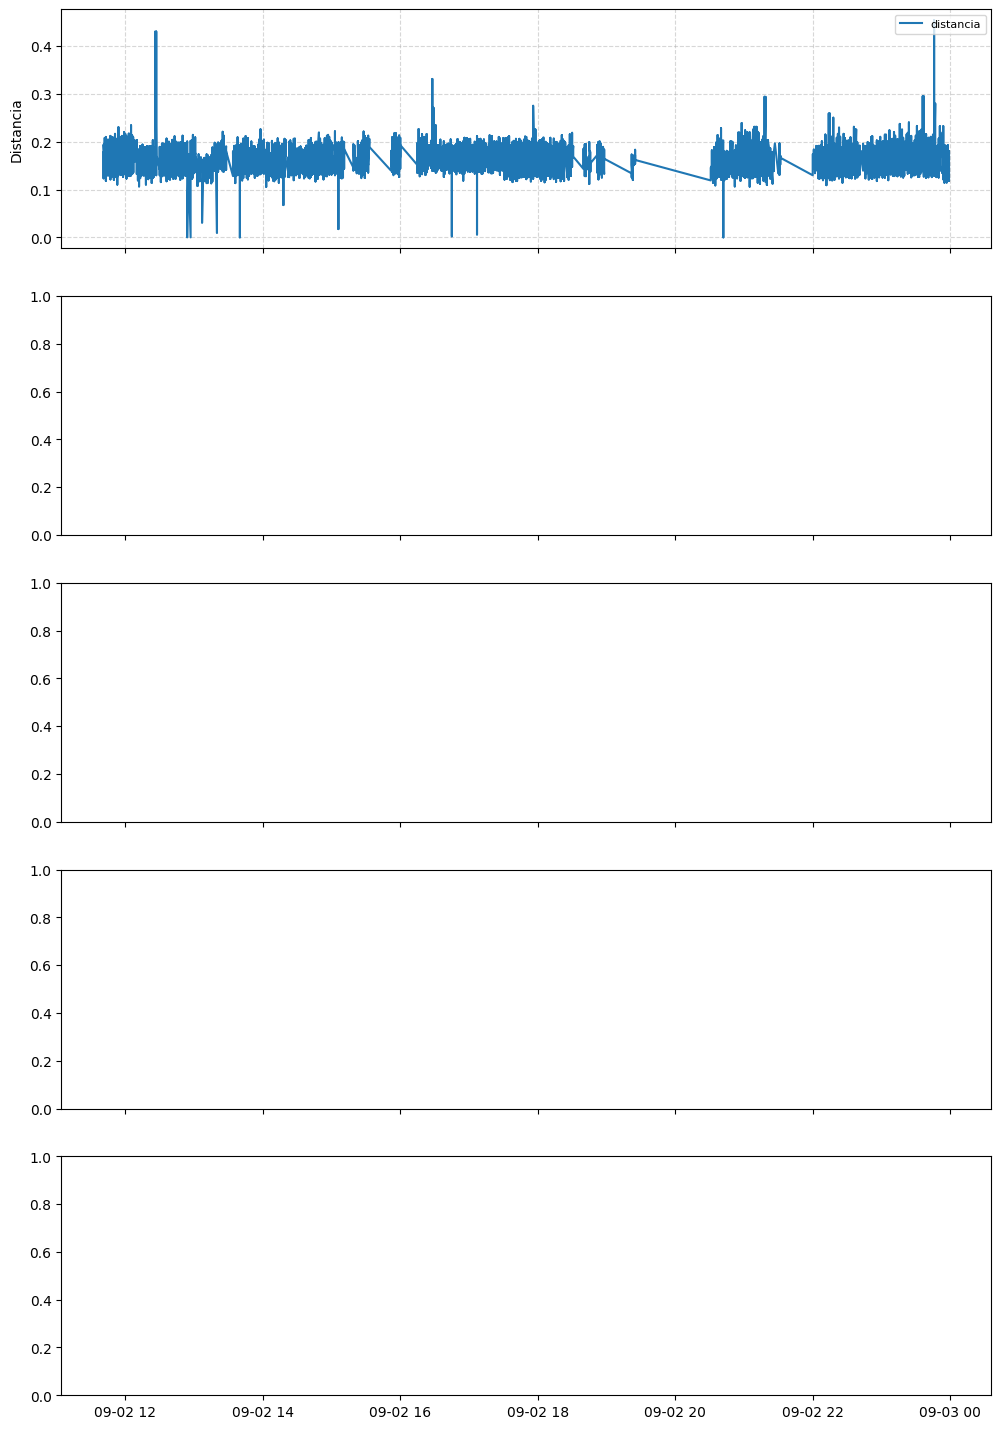

In [ ]:
for fecha, df_dia in grupos:
    guardado = guardado + 1
    # Si no hay registros en un dpia, se salta
    if df_dia.empty:
        continue
    
    # Creamos la figura con 5 subplots compartiendo el eje X
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18), sharex=True)
    
    # Iteramos sobre las columnas para crear cada gráfico del día actual
    for i, col in enumerate(columnas_y):
        axes[i].plot(df_dia['timestamp'], df_dia[col], label=col, color=f'C{i}', linewidth=1.5)
        axes[i].set_ylabel(col.capitalize(), fontsize=10)
        axes[i].legend(loc='upper right', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        
        # --- RESOLUCIÓN HORARIA ---
        # Configuramos el eje X para mostrar marcas cada 2 horas
        axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        
        # Marcas menores cada 30 min para mayor detalle visual
        axes[i].xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))

    # Etiquetas finales para cada bloque de gráficos (cada día)
    plt.xlabel('Hora del día', fontsize=12)
    plt.suptitle(f'Análisis de Soldadura - Fecha: {fecha.strftime("%d/%m/%Y")}', fontsize=16, y=1.02)
    
    # Rotar las etiquetas de tiempo para que no se traslapen
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()